In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
def train_random_forest():
    global rf_inst
    global training_files
    global features
    global labels
    global features_train
    global features_test
    global labels_train
    global labels_test
    global X_train
    global X_test
    global sc

    for fname in training_files:
        meal = open(fname, "rt")
        for line in meal:
            data_list = line.rsplit(",")
            if(len(data_list) != 14):
                print("error data")
            else:
                data_list[(len(data_list)-1)]=data_list[(len(data_list)-1)].replace('\n', '')
                features.append(data_list[:(len(data_list)-1)])
                labels.append(data_list[(len(data_list)-1)])
        meal.close()
    print(f"Size of feature dataset : {len(features)}")
    print("Features first and last entries:\n\t", end = "")
    print(features[:1] + features[(len(features)-1):])
    print("Labels first and last entries:\n\t", end = "")
    print(labels[:1] + labels[(len(features)-1):])
    
    data_counter = Counter(labels)
    print(data_counter)
    
    over = SMOTE()
    under = RandomUnderSampler()
#     over = SMOTE(sampling_strategy=0.1)
#     under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    
    features, labels = pipeline.fit_resample(features, labels)
    
    data_counter = Counter(labels)
    print(data_counter)
    
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, stratify=labels, random_state = 0)
    
    # Feature scaling (or standardization)
    sc = StandardScaler()
    X_train = sc.fit_transform(features_train)
    X_test = sc.transform(features_test)
    
    rf_inst.fit(X_train, labels_train)
    
    labels_pred = rf_inst.predict(X_test)
    
    cm = confusion_matrix(labels_test,labels_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Random Forest') # fmt='d' formats the numbers as digits, which means integers
    
    print(classification_report(labels_test,labels_pred))
    
    lr_auc = roc_auc_score(labels_test, labels_pred)
    print('Random Forest: ROC AUC=%.3f' % (lr_auc))

Size of feature dataset : 549
Features first and last entries:
	[['0.8755519298449245', '0.0', '28.0', '654477784.9398003', '607147907.414416', '0.0', '0.0', '0.0', '0.0', '19799.543905240946', '0.0', '0.0', '97'], ['1.5295377237136691', '0.0', '10925.177836081204', '803387474.4320431', '1450863647.5280013', '1.479019945774904', '0.0', '63.86373297019906', '247.4893375930006', '18062.635905486404', '0.0', '171.62232437017695', '12']]
Labels first and last entries:
	['1', '0']
Counter({'0': 328, '1': 221})
Counter({'0': 328, '1': 328})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

Random Forest: ROC AUC=1.000


C:\Users\H P VICTUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
C:\Users\H P VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


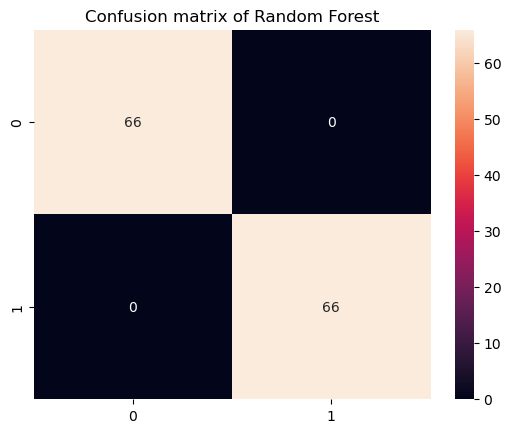

In [3]:
features, labels = [], []
rf_inst = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
training_files = ["dataset/individual/tcp_dataset_individual_attack_1.csv",
                  "dataset/individual/tcp_dataset_individual_attack_2.csv",
                  "dataset/individual/tcp_dataset_individual_normal_1.csv",
                  "dataset/individual/tcp_dataset_individual_normal_2.csv"]
train_random_forest()

In [4]:
time_start = time.perf_counter()
result = rf_inst.predict([X_test[0]])[0]
print(f"Time elapse for prediction : {time.perf_counter() - time_start}")
print(f"Correct result : {labels_test[0]}")
print(f"Predicted result : {result}")

Time elapse for prediction : 0.0013912000000000369
Correct result : 1
Predicted result : 1


In [5]:
time_start = time.perf_counter()
data = sc.transform([features_test[2]])
result = rf_inst.predict([data[0]])[0]
print(f"Time elapse for prediction : {time.perf_counter() - time_start}")
print(f"Correct result : {labels_test[2]}")
print(f"Predicted result : {result}")

Time elapse for prediction : 0.0016172999999999327
Correct result : 1
Predicted result : 1
